In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import glob
import os
from os import path
from PIL import Image
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [0]:
from keras.utils import to_categorical

In [36]:
files=os.listdir('drive/My Drive/segnet')
files

['annotations_prepped_train',
 'annotations_prepped_test',
 'images_prepped_test',
 'images_prepped_train']

In [37]:
image_names = [f for f in os.listdir('drive/My Drive/segnet/annotations_prepped_train') if f.endswith('.png')]
len(image_names)

367

In [38]:
IMAGE_PATH = 'drive/My Drive/segnet/images_prepped_test' 
file_paths = glob.glob(path.join(IMAGE_PATH, '*.png'))

# Load the images
images_prepped_test = [Image.open(path) for path in file_paths]
images_prepped_test = [img.resize((480, 320),Image.ANTIALIAS) for img in images_prepped_test]
images_prepped_test_np = np.array([np.array(img) for img in images_prepped_test])
images_prepped_test_np.shape

(101, 320, 480, 3)

In [0]:
images_prepped_test_np = images_prepped_test_np/255.0

In [40]:
len(images_prepped_test)

101

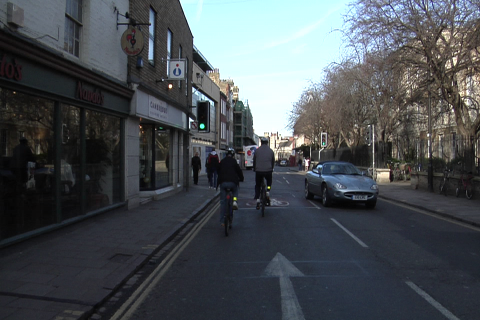

In [41]:
images_prepped_test[0]

In [42]:
a = images_prepped_test_np[0,1,1,:]
a

array([0.34509804, 0.38039216, 0.40784314])

In [43]:
IMAGE_PATH = 'drive/My Drive/segnet/annotations_prepped_train'


annotations_prepped_train = [Image.open(os.path.join(IMAGE_PATH, name)) for name in image_names]
annotations_prepped_train = [img.resize((480, 320),Image.ANTIALIAS) for img in annotations_prepped_train]
annotations_prepped_train_np = np.array([np.array(img) for img in annotations_prepped_train])
annotations_prepped_train_np = np.expand_dims(annotations_prepped_train_np, axis=3)
annotations_prepped_train_np.shape

(367, 320, 480, 1)

In [44]:
annotations_prepped_train_np[0].shape

(320, 480, 1)

In [45]:
img = annotations_prepped_train_np[10].reshape(320,480)
img.shape

(320, 480)

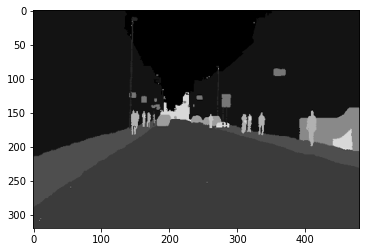

In [46]:
plt.imshow(img, cmap="gray")
plt.show()

In [47]:
IMAGE_PATH = 'drive/My Drive/segnet/annotations_prepped_test' 
file_paths = glob.glob(path.join(IMAGE_PATH, '*.png'))

# Load the images
annotations_prepped_test = [Image.open(path) for path in file_paths]
annotations_prepped_test = [img.resize((480, 320),Image.ANTIALIAS) for img in annotations_prepped_test]
annotations_prepped_test_np = np.array([np.array(img) for img in annotations_prepped_test])
annotations_prepped_test_np = np.expand_dims(annotations_prepped_test_np, axis=3)
annotations_prepped_test_np.shape

(101, 320, 480, 1)

In [48]:
img = annotations_prepped_test_np[0].reshape(320,480)
img.shape

(320, 480)

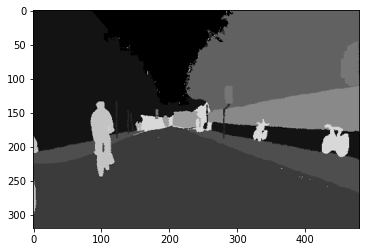

In [49]:
plt.imshow(img, cmap="gray")
plt.show()

In [50]:
a = np.unique(annotations_prepped_test_np[:,:,:,:])
a
#-->array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
     # dtype=uint8)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=uint8)

In [51]:
IMAGE_PATH = 'drive/My Drive/segnet/images_prepped_train' 
file_paths = glob.glob(path.join(IMAGE_PATH, '*.png'))

# Load the images
images_prepped_train = [Image.open(os.path.join(IMAGE_PATH, name)) for name in image_names]
print(len(images_prepped_train))
images_prepped_train = [img.resize((480, 320),Image.ANTIALIAS) for img in images_prepped_train]
images_prepped_train_np = np.array([np.array(img) for img in images_prepped_train])
images_prepped_train_np.shape

367


(367, 320, 480, 3)

In [0]:
images_prepped_train_np = images_prepped_train_np/255.0

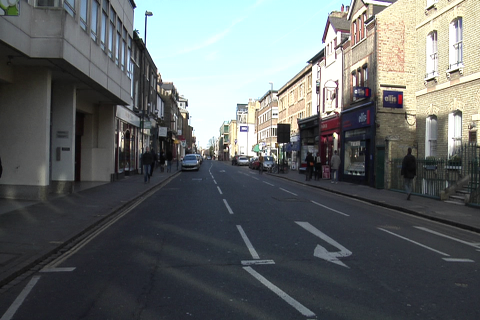

In [53]:
images_prepped_train[10]

In [54]:
len(images_prepped_train)

367

In [0]:
import keras

In [0]:
from keras.preprocessing import image as kImage

In [0]:
from keras import Input

In [0]:
from keras.models import Model, Sequential
from keras.layers import Input, UpSampling2D, concatenate, Conv2D, Dense, Softmax, MaxPooling2D, Dropout, concatenate
from keras.optimizers import Adam
import keras.backend as K
import tensorflow as tf
from keras import regularizers

In [59]:
inputs = Input((320,480,3))

conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)



conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = UpSampling2D(size = (2,2))(drop5)
up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up6)
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = UpSampling2D(size = (2,2))(conv6)
up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up7)
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

up8 = UpSampling2D(size = (2,2))(conv7)
up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up8)
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = Conv2D(15, 3, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(conv9)


model = Model(input = inputs, output = conv9)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 320, 480, 3)  0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 320, 480, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 320, 480, 64) 36928       conv2d_24[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 160, 240, 64) 0           conv2d_25[0][0]                  
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [0]:
model.compile(optimizer = Adam(lr = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint

In [62]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

history = model.fit(images_prepped_train_np, annotations_prepped_train_np, validation_split=0.15, batch_size=8, callbacks=[checkpoint], epochs=25)

Train on 311 samples, validate on 56 samples
Epoch 1/30
311/311 [==============================] - 39s 124ms/step - loss: 1.9372 - accuracy: 0.4204 - val_loss: 1.5351 - val_accuracy: 0.5675
Epoch 2/30
311/311 [==============================] - 31s 98ms/step - loss: 1.1509 - accuracy: 0.6549 - val_loss: 1.1006 - val_accuracy: 0.6647
Epoch 3/30
311/311 [==============================] - 31s 99ms/step - loss: 1.0984 - accuracy: 0.6551 - val_loss: 1.1356 - val_accuracy: 0.6306
Epoch 4/30
311/311 [==============================] - 31s 99ms/step - loss: 0.9921 - accuracy: 0.6885 - val_loss: 0.9424 - val_accuracy: 0.7146
Epoch 5/30
311/311 [==============================] - 31s 99ms/step - loss: 0.9261 - accuracy: 0.7113 - val_loss: 0.8838 - val_accuracy: 0.7409
Epoch 6/30
311/311 [==============================] - 31s 98ms/step - loss: 0.8167 - accuracy: 0.7451 - val_loss: 0.9205 - val_accuracy: 0.7279
Epoch 7/30
311/311 [==============================] - 31s 99ms/step - loss: 0.7947 - accur

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


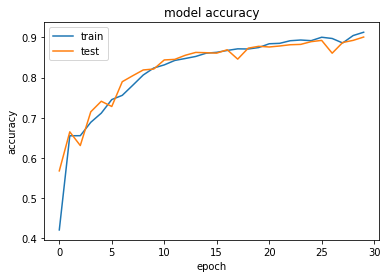

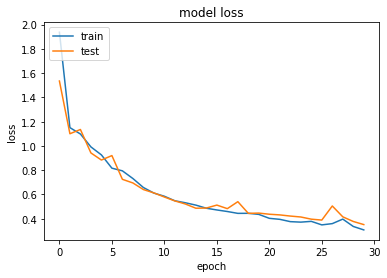

In [66]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from keras.models import load_model

In [0]:
model = load_model('model-030.model')

In [75]:
model.evaluate(images_prepped_test_np, annotations_prepped_test_np)

101/101 [==============================] - 3s 29ms/step


[1.7079593368095927, 0.6892823576927185]

In [0]:
pred = model.predict(np.expand_dims(images_prepped_test_np[0], axis=0))

In [81]:
pred.shape

(1, 320, 480, 15)

In [0]:
pred = np.argmax(pred, axis=-1)

In [85]:
pred.shape

(1, 320, 480)

In [0]:
pred = pred.reshape(320,480)

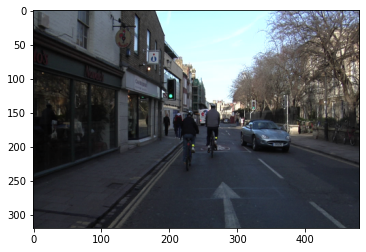

In [91]:
imgplot = plt.imshow(images_prepped_test_np[0])

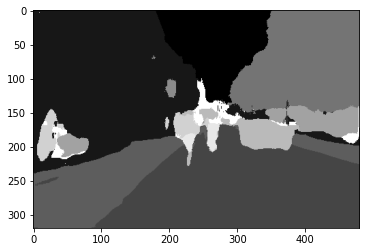

In [89]:
plt.imshow(pred, cmap="gray")
plt.show()